#### Exploring genomic data using R

In [2]:
var <- read.csv("variants_long_table.csv")
head(var)

ï..SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER
ERR5181310,MN908947.3,241,C,T,PASS,8524,6,8518,1,orf1ab,upstream_gene_variant,c.-25C>T,.,.,ivar
ERR5181310,MN908947.3,1807,A,G,PASS,2890,1,2889,1,orf1ab,synonymous_variant,c.1542A>G,p.Gly514Gly,p.G514G,ivar
ERR5181310,MN908947.3,2659,G,A,PASS,13621,4,13617,1,orf1ab,synonymous_variant,c.2394G>A,p.Lys798Lys,p.K798K,ivar
ERR5181310,MN908947.3,3037,C,T,PASS,2718,0,2718,1,orf1ab,synonymous_variant,c.2772C>T,p.Phe924Phe,p.F924F,ivar
ERR5181310,MN908947.3,6285,C,T,PASS,20212,0,20212,1,orf1ab,missense_variant,c.6020C>T,p.Thr2007Ile,p.T2007I,ivar
ERR5181310,MN908947.3,8593,T,C,PASS,2414,0,2414,1,orf1ab,synonymous_variant,c.8328T>C,p.Val2776Val,p.V2776V,ivar


In [3]:
# Summary statistics of the whole data
summary(var)

       ï..SAMPLE         CHROM          POS                REF          ALT    
 ERR5181310 :33   MN908947.3:153   Min.   :  100   C         :60   T      :79  
 ERR5405022 :36                    1st Qu.:11287   G         :34   G      :30  
 ERR5556343 :35                    Median :21974   A         :21   C      :21  
 ERR5743893 :28                    Mean   :18539   T         :20   A      :17  
 SRR13500958:21                    3rd Qu.:26305   GG        : 3   AA     : 3  
                                   Max.   :29834   GTCTGGTTTT: 3   CTA    : 1  
                                                   (Other)   :12   (Other): 2  
  FILTER          DP            REF_DP            ALT_DP            AF        
 PASS:153   Min.   :   38   Min.   :    0.0   Min.   :   38   Min.   :0.3800  
            1st Qu.:  369   1st Qu.:    0.0   1st Qu.:  369   1st Qu.:1.0000  
            Median : 1014   Median :    0.0   Median : 1014   Median :1.0000  
            Mean   : 2635   Mean   :  565.8 

In [24]:
# Preview the data using a spreadsheet-style data viewer
View(var)

SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERR5181310,MN908947.3,241,C,T,PASS,8524,6,8518,1.00,orf1ab,upstream_gene_variant,c.-25C>T,.,.,ivar
ERR5181310,MN908947.3,1807,A,G,PASS,2890,1,2889,1.00,orf1ab,synonymous_variant,c.1542A>G,p.Gly514Gly,p.G514G,ivar
ERR5181310,MN908947.3,2659,G,A,PASS,13621,4,13617,1.00,orf1ab,synonymous_variant,c.2394G>A,p.Lys798Lys,p.K798K,ivar
ERR5181310,MN908947.3,3037,C,T,PASS,2718,0,2718,1.00,orf1ab,synonymous_variant,c.2772C>T,p.Phe924Phe,p.F924F,ivar
ERR5181310,MN908947.3,6285,C,T,PASS,20212,0,20212,1.00,orf1ab,missense_variant,c.6020C>T,p.Thr2007Ile,p.T2007I,ivar
ERR5181310,MN908947.3,8593,T,C,PASS,2414,0,2414,1.00,orf1ab,synonymous_variant,c.8328T>C,p.Val2776Val,p.V2776V,ivar
ERR5181310,MN908947.3,9565,C,T,PASS,874,0,874,1.00,orf1ab,synonymous_variant,c.9300C>T,p.Phe3100Phe,p.F3100F,ivar
ERR5181310,MN908947.3,11287,GTCTGGTTTT,G,PASS,14161,14068,14072,0.99,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar
ERR5181310,MN908947.3,14407,CC,TT,PASS,2766,0,2766,1.00,orf1ab,synonymous_variant,c.14142_14143delCCinsTT,p.4716,p.4716,ivar


In [26]:
# Select columns 1, 4, 5
var[, c(1, 4, 5)]

SAMPLE,REF,ALT
<chr>,<chr>,<chr>
ERR5181310,C,T
ERR5181310,A,G
ERR5181310,G,A
ERR5181310,C,T
ERR5181310,C,T
ERR5181310,T,C
ERR5181310,C,T
ERR5181310,GTCTGGTTTT,G
ERR5181310,CC,TT


In [29]:
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [30]:
# Select columns 1, 4, 5 with default display
select(var, SAMPLE, REF, ALT)

SAMPLE,REF,ALT
<chr>,<chr>,<chr>
ERR5181310,C,T
ERR5181310,A,G
ERR5181310,G,A
ERR5181310,C,T
ERR5181310,C,T
ERR5181310,T,C
ERR5181310,C,T
ERR5181310,GTCTGGTTTT,G
ERR5181310,CC,TT


In [31]:
# Select columns 1, 4, 5 with selected display

select(var, SAMPLE, REF, ALT) %>% head(3)

,SAMPLE,REF,ALT
,<chr>,<chr>,<chr>
1,ERR5181310,C,T
2,ERR5181310,A,G
3,ERR5181310,G,A


In [32]:
# Select all columns except the column “CALLER” with selected display
select(var, -CALLER) %>% head(3)

,SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ERR5181310,MN908947.3,241,C,T,PASS,8524,6,8518,1,orf1ab,upstream_gene_variant,c.-25C>T,.,.
2,ERR5181310,MN908947.3,1807,A,G,PASS,2890,1,2889,1,orf1ab,synonymous_variant,c.1542A>G,p.Gly514Gly,p.G514G
3,ERR5181310,MN908947.3,2659,G,A,PASS,13621,4,13617,1,orf1ab,synonymous_variant,c.2394G>A,p.Lys798Lys,p.K798K


In [33]:
# Transform the data frame into a tibble
var_tb <- as_tibble(var)
select(var_tb, SAMPLE, REF, ALT) %>% head(3)

SAMPLE,REF,ALT
<chr>,<chr>,<chr>
ERR5181310,C,T
ERR5181310,A,G
ERR5181310,G,A


#### Filtering rows

In [35]:
# Select rows with selected display
var_tb[var_tb$SAMPLE == "SRR13500958",]

SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SRR13500958,MN908947.3,100,C,T,PASS,904,1,903,1.00,orf1ab,upstream_gene_variant,c.-166C>T,.,.,ivar
SRR13500958,MN908947.3,241,C,T,PASS,1794,0,1794,1.00,orf1ab,upstream_gene_variant,c.-25C>T,.,.,ivar
SRR13500958,MN908947.3,3037,C,T,PASS,667,0,667,1.00,orf1ab,synonymous_variant,c.2772C>T,p.Phe924Phe,p.F924F,ivar
SRR13500958,MN908947.3,3766,T,C,PASS,1350,0,1350,1.00,orf1ab,synonymous_variant,c.3501T>C,p.Asp1167Asp,p.D1167D,ivar
SRR13500958,MN908947.3,6347,C,T,PASS,331,0,331,1.00,orf1ab,synonymous_variant,c.6082C>T,p.Leu2028Leu,p.L2028L,ivar
SRR13500958,MN908947.3,10667,T,G,PASS,324,1,323,1.00,orf1ab,missense_variant,c.10402T>G,p.Leu3468Val,p.L3468V,ivar
SRR13500958,MN908947.3,11824,C,T,PASS,402,0,402,1.00,orf1ab,synonymous_variant,c.11559C>T,p.Ile3853Ile,p.I3853I,ivar
SRR13500958,MN908947.3,12053,C,T,PASS,1297,0,1297,1.00,orf1ab,missense_variant,c.11788C>T,p.Leu3930Phe,p.L3930F,ivar
SRR13500958,MN908947.3,12964,A,G,PASS,555,0,555,1.00,orf1ab,synonymous_variant,c.12699A>G,p.Gly4233Gly,p.G4233G,ivar


In [36]:
# Select rows with selected display using dplyr functions
filter(var_tb, SAMPLE == "SRR13500958") %>% head(3)

SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SRR13500958,MN908947.3,100,C,T,PASS,904,1,903,1,orf1ab,upstream_gene_variant,c.-166C>T,.,.,ivar
SRR13500958,MN908947.3,241,C,T,PASS,1794,0,1794,1,orf1ab,upstream_gene_variant,c.-25C>T,.,.,ivar
SRR13500958,MN908947.3,3037,C,T,PASS,667,0,667,1,orf1ab,synonymous_variant,c.2772C>T,p.Phe924Phe,p.F924F,ivar


#### Filtering columns and rows

In [37]:
# Select sample type (rows) and variables (columns) with selected display
var_tb %>% filter(SAMPLE == "SRR13500958") %>% select(CHROM, POS, REF, ALT) %>% head(3)


CHROM,POS,REF,ALT
<chr>,<int>,<chr>,<chr>
MN908947.3,100,C,T
MN908947.3,241,C,T
MN908947.3,3037,C,T


In [38]:
# To select all data related to the sample specified
var_tb %>% filter(SAMPLE == "SRR13500958") %>% select(CHROM, POS, REF, ALT, DP)


CHROM,POS,REF,ALT,DP
<chr>,<int>,<chr>,<chr>,<int>
MN908947.3,100,C,T,904
MN908947.3,241,C,T,1794
MN908947.3,3037,C,T,667
MN908947.3,3766,T,C,1350
MN908947.3,6347,C,T,331
MN908947.3,10667,T,G,324
MN908947.3,11824,C,T,402
MN908947.3,12053,C,T,1297
MN908947.3,12964,A,G,555


In [39]:
# To select only values for which DP>=500 for the same sample
var_tb %>% filter(SAMPLE == "SRR13500958" & DP>=500) %>% select(CHROM, POS, REF, ALT, DP)


CHROM,POS,REF,ALT,DP
<chr>,<int>,<chr>,<chr>,<int>
MN908947.3,100,C,T,904
MN908947.3,241,C,T,1794
MN908947.3,3037,C,T,667
MN908947.3,3766,T,C,1350
MN908947.3,12053,C,T,1297
MN908947.3,12964,A,G,555
MN908947.3,13647,C,T,922
MN908947.3,14408,C,T,1107
MN908947.3,23012,G,A,710


In [40]:
# To select only values for which DP>=1000 for the same sample
var_tb %>% filter(SAMPLE == "SRR13500958" & DP>=1000) %>% select(CHROM, POS, REF, ALT, DP)

CHROM,POS,REF,ALT,DP
<chr>,<int>,<chr>,<chr>,<int>
MN908947.3,241,C,T,1794
MN908947.3,3766,T,C,1350
MN908947.3,12053,C,T,1297
MN908947.3,14408,C,T,1107
MN908947.3,28253,C,T,2149
MN908947.3,28881,GG,AA,2207
MN908947.3,28883,G,C,2212
MN908947.3,28975,G,T,1127


#### Count specific columns and rows

In [41]:
# Count how many rows are associated with each sample in the data 
var_tb %>% count(SAMPLE)

SAMPLE,n
<chr>,<int>
ERR5181310,33
ERR5405022,36
ERR5556343,35
ERR5743893,28
SRR13500958,21


In [42]:
# Sorting the counts 
var_tb %>% count(SAMPLE, sort = TRUE)

SAMPLE,n
<chr>,<int>
ERR5405022,36
ERR5556343,35
ERR5181310,33
ERR5743893,28
SRR13500958,21


In [43]:
# Distribution of genes per sample and counts 
var_tb %>% count(SAMPLE, GENE, sort = TRUE) %>% head()

SAMPLE,GENE,n
<chr>,<chr>,<int>
ERR5405022,orf1ab,17
ERR5556343,orf1ab,15
ERR5181310,S,12
ERR5181310,orf1ab,12
ERR5556343,S,12
SRR13500958,orf1ab,12


#### Compute operations in new columns

In [47]:
# Compute a LOG2 transformation on DP values
var_tb_log <- var_tb %>% mutate(DP_log2 = log2(DP))

# View the table columns with the DP_log2 new column appended
head(var_tb_log)


SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER,DP_log2
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
ERR5181310,MN908947.3,241,C,T,PASS,8524,6,8518,1,orf1ab,upstream_gene_variant,c.-25C>T,.,.,ivar,13.05731
ERR5181310,MN908947.3,1807,A,G,PASS,2890,1,2889,1,orf1ab,synonymous_variant,c.1542A>G,p.Gly514Gly,p.G514G,ivar,11.49685
ERR5181310,MN908947.3,2659,G,A,PASS,13621,4,13617,1,orf1ab,synonymous_variant,c.2394G>A,p.Lys798Lys,p.K798K,ivar,13.73355
ERR5181310,MN908947.3,3037,C,T,PASS,2718,0,2718,1,orf1ab,synonymous_variant,c.2772C>T,p.Phe924Phe,p.F924F,ivar,11.40833
ERR5181310,MN908947.3,6285,C,T,PASS,20212,0,20212,1,orf1ab,missense_variant,c.6020C>T,p.Thr2007Ile,p.T2007I,ivar,14.30292
ERR5181310,MN908947.3,8593,T,C,PASS,2414,0,2414,1,orf1ab,synonymous_variant,c.8328T>C,p.Val2776Val,p.V2776V,ivar,11.23721


In [48]:
# View a selected content
select(var_tb_log, SAMPLE, REF, ALT, DP, DP_log2) %>% head()

SAMPLE,REF,ALT,DP,DP_log2
<chr>,<chr>,<chr>,<int>,<dbl>
ERR5181310,C,T,8524,13.05731
ERR5181310,A,G,2890,11.49685
ERR5181310,G,A,13621,13.73355
ERR5181310,C,T,2718,11.40833
ERR5181310,C,T,20212,14.30292
ERR5181310,T,C,2414,11.23721


In [52]:
#var_tb %>% count(DP100 = DP/100) %>% select(SAMPLE, DP, DP100) %>% str()
var_tb %>% group_by(SAMPLE) %>% summarize(mean(DP))

SAMPLE,mean(DP)
<chr>,<dbl>
ERR5181310,8097.6667
ERR5405022,927.9722
ERR5556343,1381.2000
ERR5743893,1186.6786
SRR13500958,999.5714


In [53]:
#var_tb %>% mutate(DP100 = DP/100) %>% select(SAMPLE, DP, DP100) %>% str()
var_tb %>% count(SAMPLE, CHROM, sort = TRUE) %>%head()
var_tb %>% count(SAMPLE, CHROM, sort = TRUE) %>%head(6)

SAMPLE,CHROM,n
<chr>,<chr>,<int>
ERR5405022,MN908947.3,36
ERR5556343,MN908947.3,35
ERR5181310,MN908947.3,33
ERR5743893,MN908947.3,28
SRR13500958,MN908947.3,21


SAMPLE,CHROM,n
<chr>,<chr>,<int>
ERR5405022,MN908947.3,36
ERR5556343,MN908947.3,35
ERR5181310,MN908947.3,33
ERR5743893,MN908947.3,28
SRR13500958,MN908947.3,21


In [55]:
#var_tb %>% summarize(DP100 = DP/100) %>% select(SAMPLE, DP, DP100) %>% str()
var_tb %>% mutate(DP100 = DP/100) %>% select(SAMPLE, DP, DP100)

SAMPLE,DP,DP100
<chr>,<int>,<dbl>
ERR5181310,8524,85.24
ERR5181310,2890,28.90
ERR5181310,13621,136.21
ERR5181310,2718,27.18
ERR5181310,20212,202.12
ERR5181310,2414,24.14
ERR5181310,874,8.74
ERR5181310,14161,141.61
ERR5181310,2766,27.66


#### Data visualization

In [57]:
library("ggplot2")

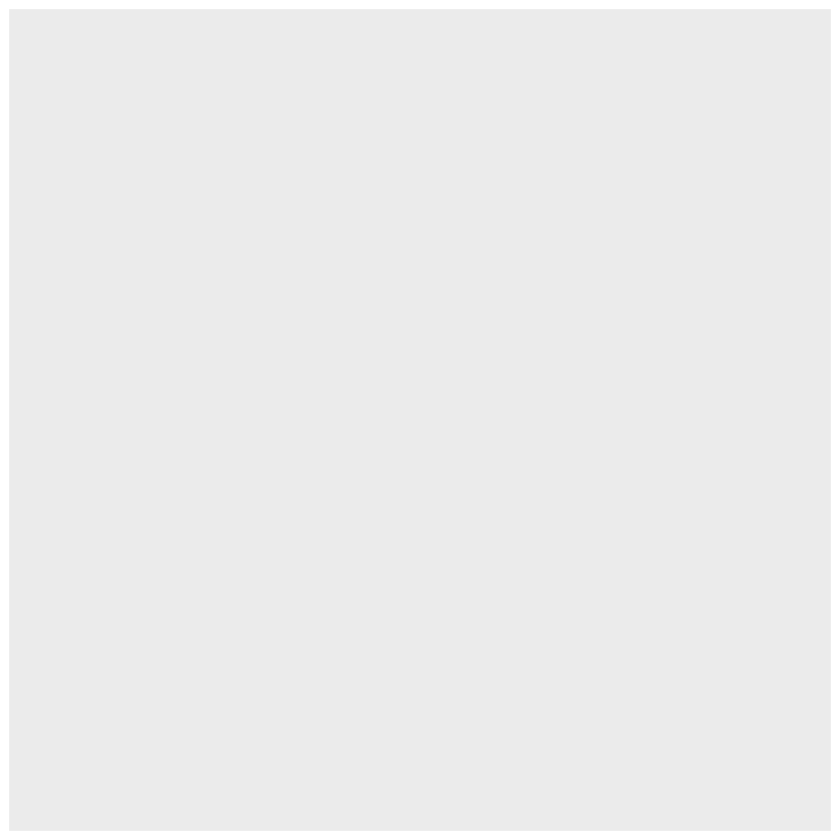

In [58]:
# Link ggplot2 to a specific data frame
ggplot(data = var_tb)

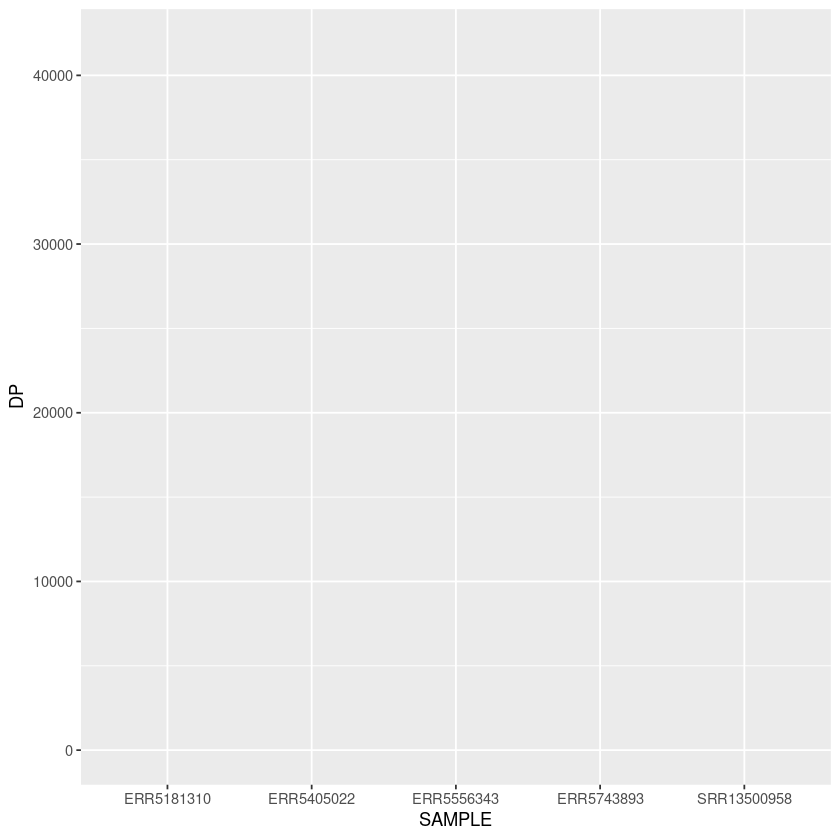

In [59]:
# Link ggplot2 to specific variables using aesthetics
ggplot(data = var_tb, aes(x=SAMPLE, y=DP))

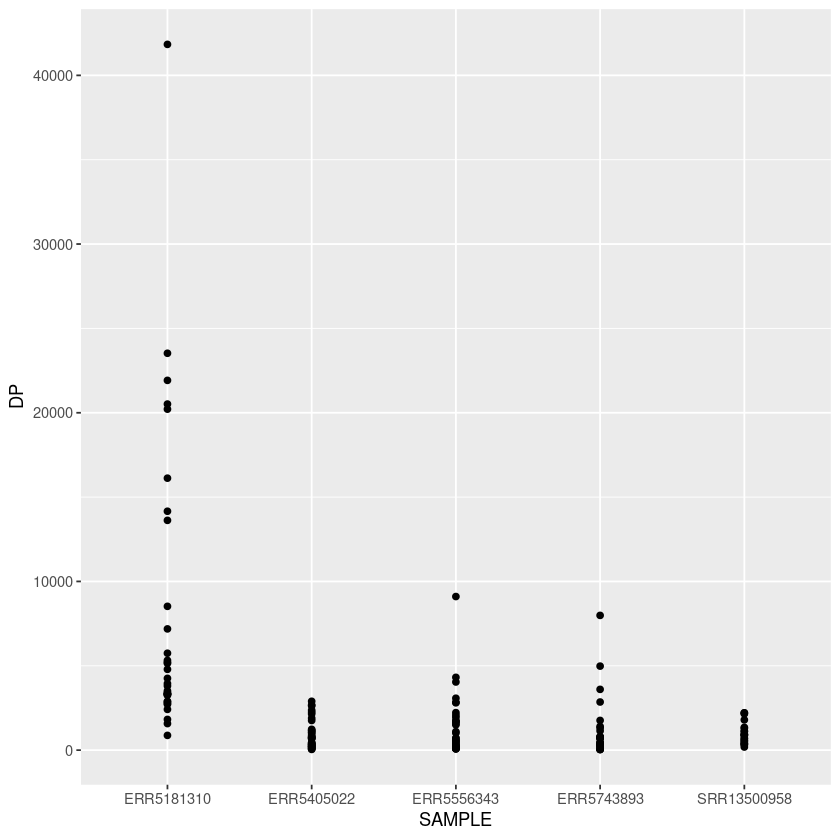

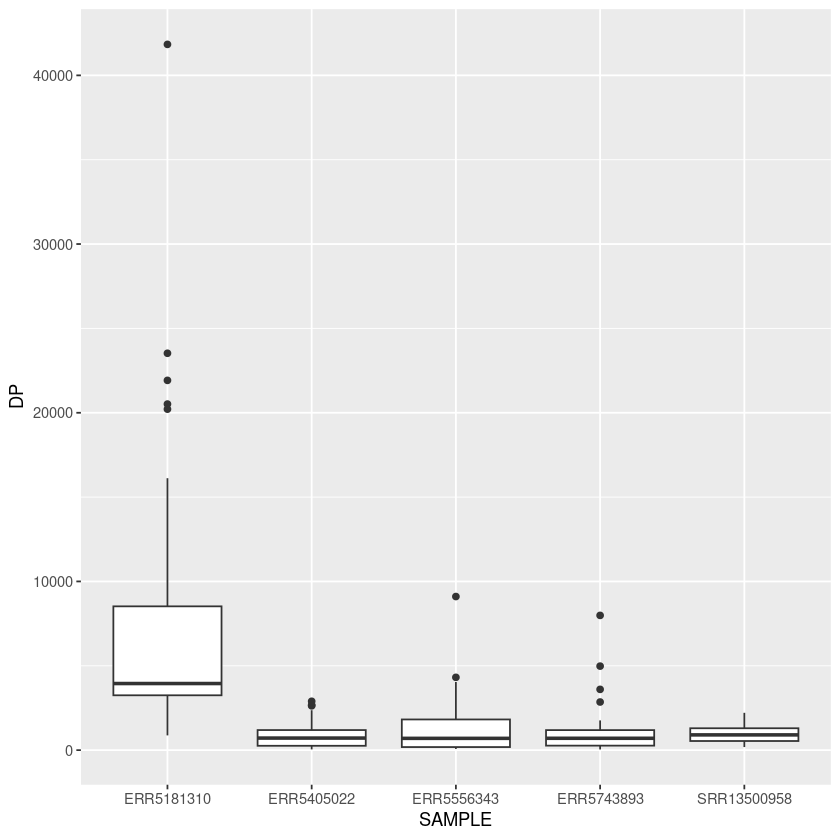

In [60]:
#Define the plot type
# Points (left-hand plot)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_point()
# Boxplot (right-hand plot)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_boxplot()

#### Plotting transformation using ggplot2

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


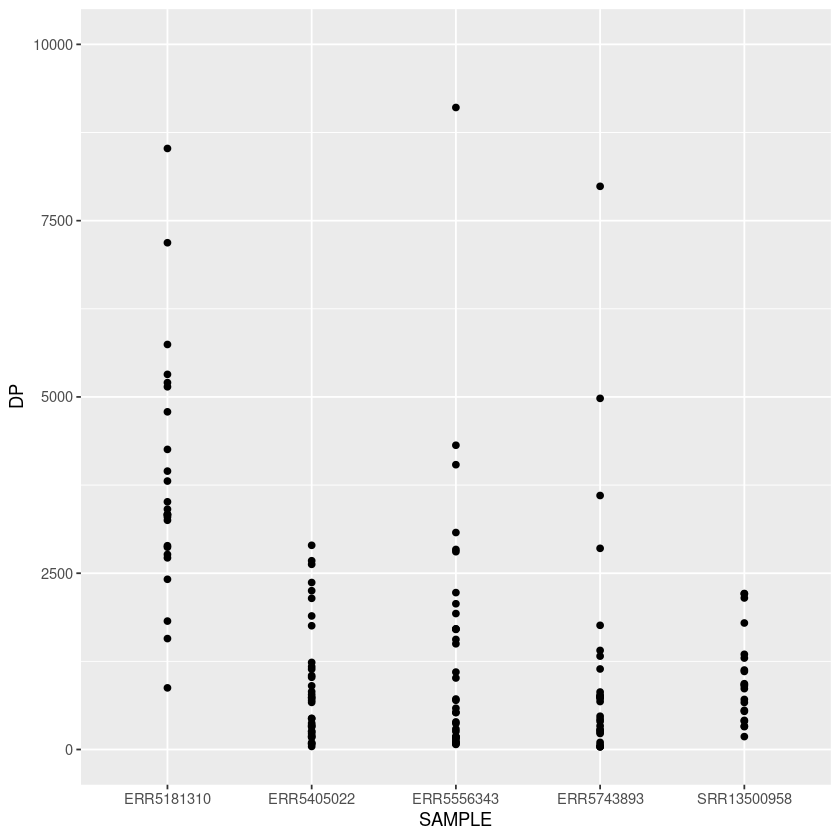

In [61]:
#Advanced plotting options: axis transformation
# Points (left-hand plot)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_point() + ylim(0,10000)

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”


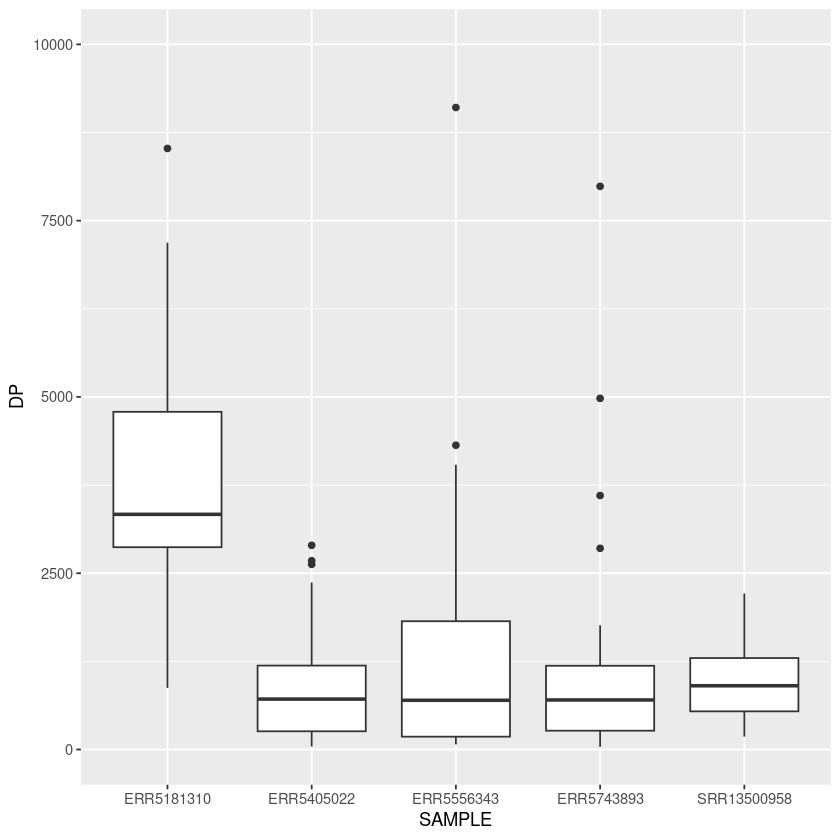

In [62]:
# Boxplot (right-hand plot)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_boxplot() + ylim(0,10000)

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”


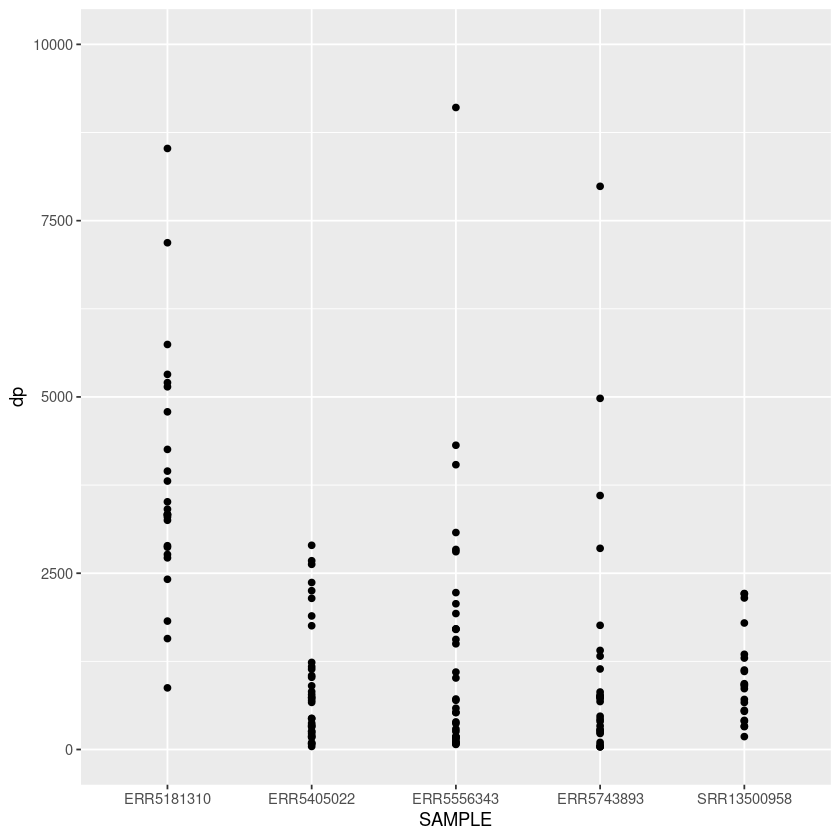

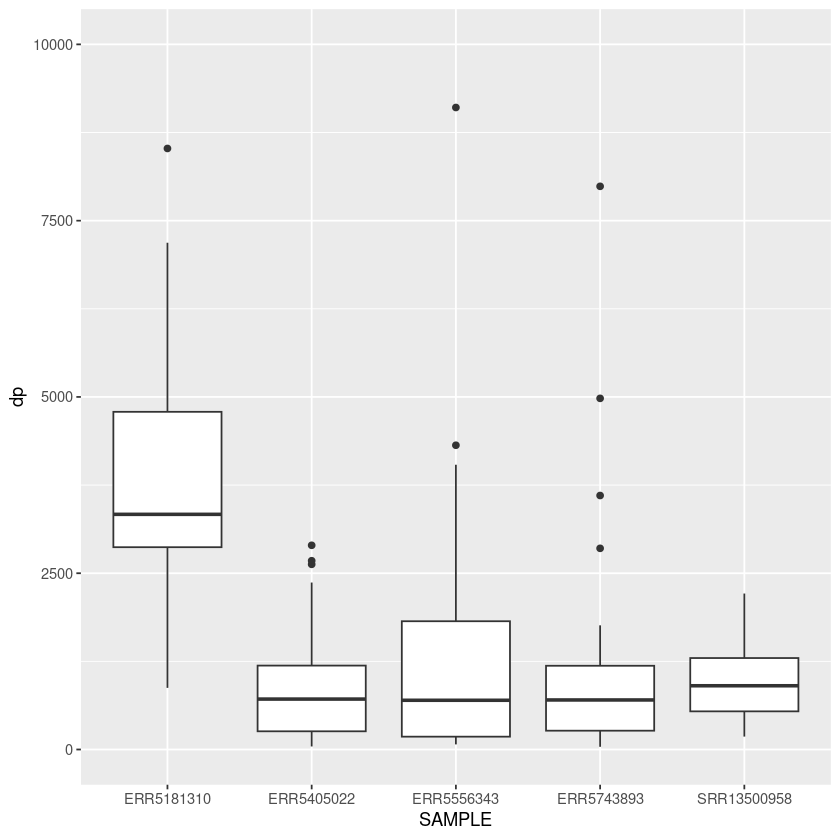

In [63]:
# Points (left-hand plot)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_point() + scale_y_continuous(name="dp", limits=c(0, 10000))

# Boxplot (right-hand plot)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_boxplot() + scale_y_continuous(name="dp", limits=c(0, 10000))

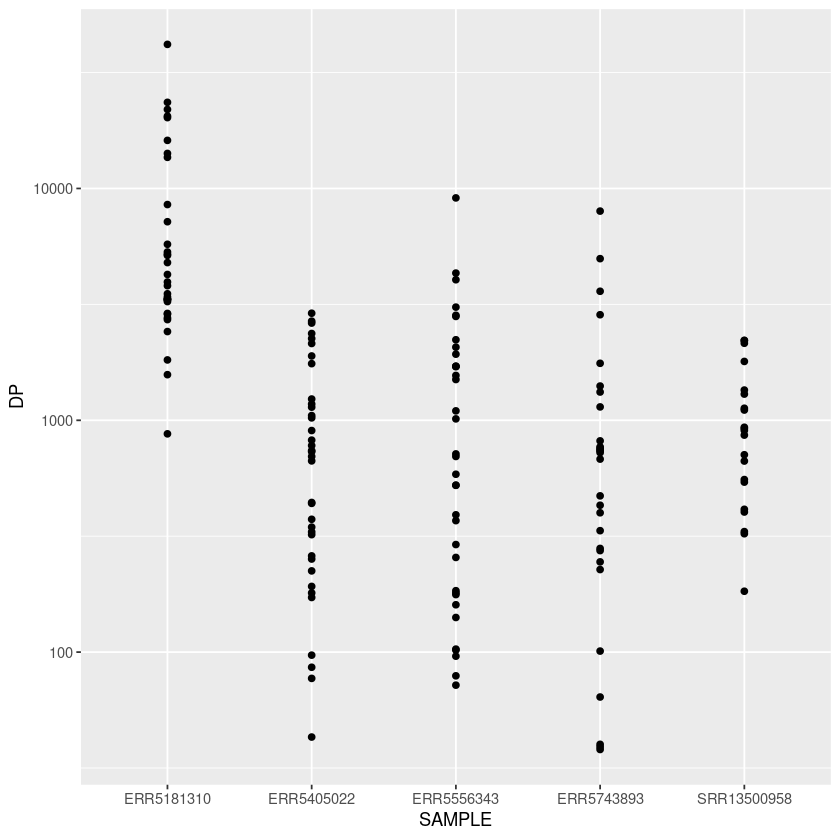

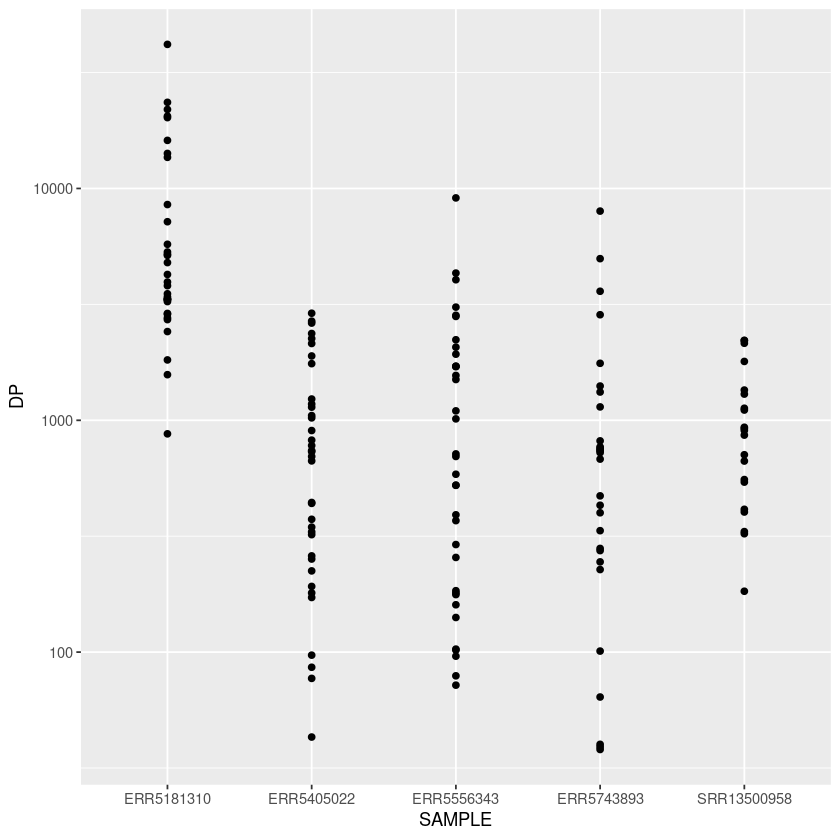

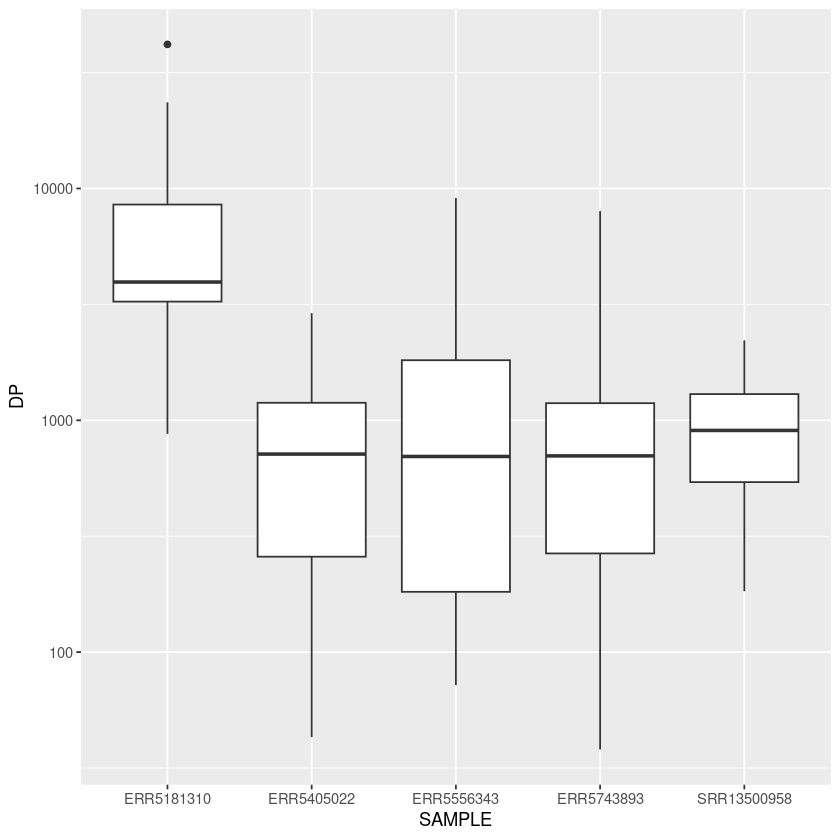

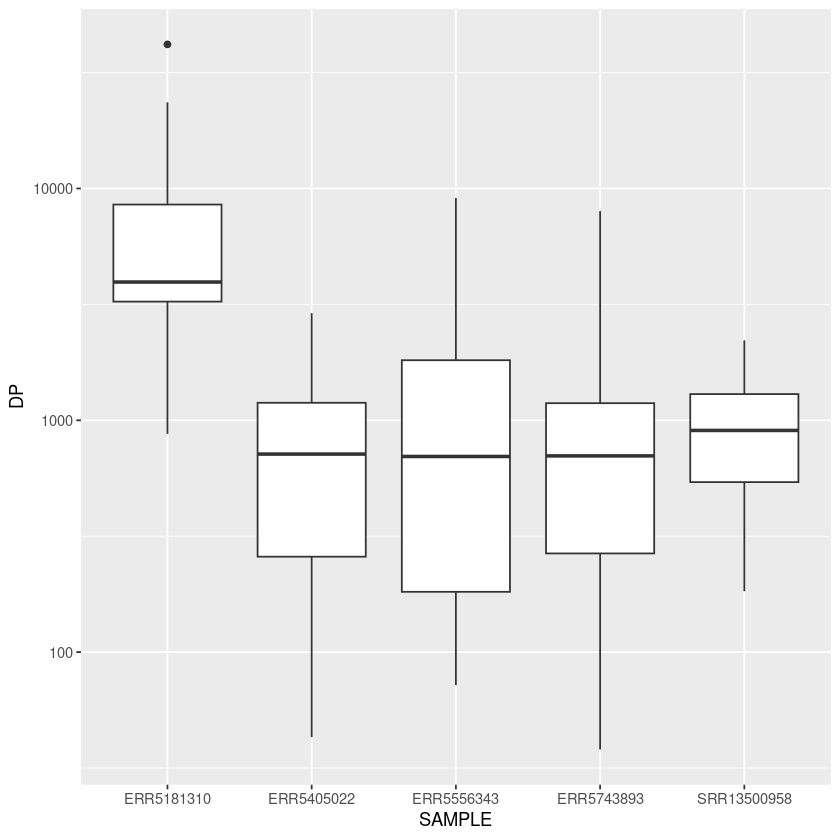

In [64]:
# Points (left-hand plot)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_point() + scale_y_continuous(trans='log10')
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_point() + scale_y_log10()

# Boxplot (right-hand plot)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_boxplot() + scale_y_continuous(trans='log10')
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) + geom_boxplot() + scale_y_log10()


Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”


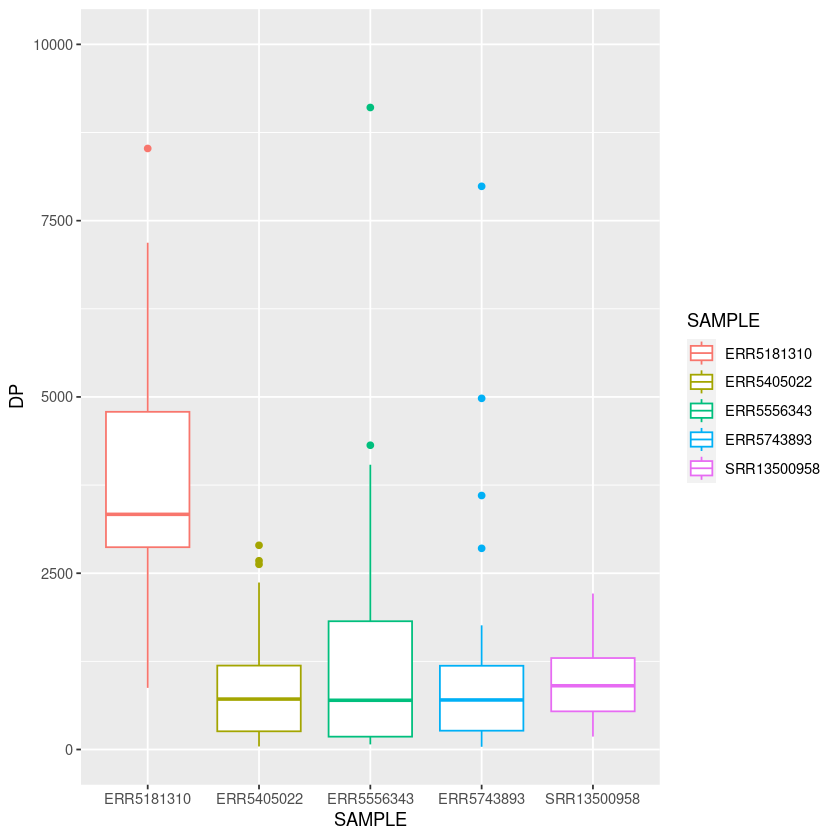

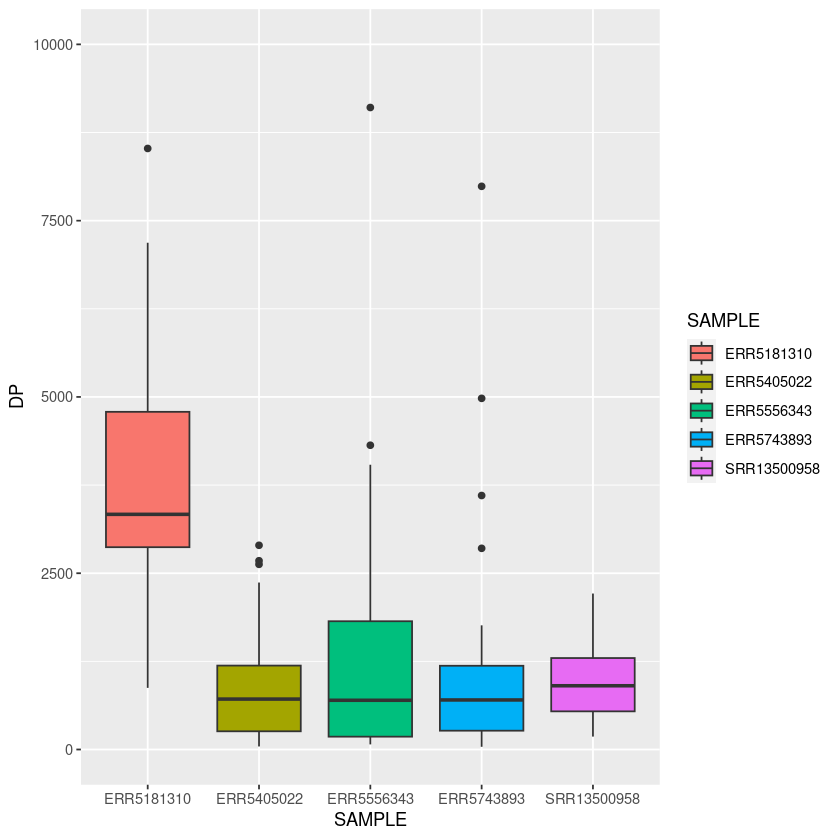

In [65]:
# Colours of shapes
ggplot(data = var_tb, aes(x=SAMPLE, y=DP, colour = SAMPLE)) + geom_boxplot() + ylim(0,10000)

# Colours for filling options
ggplot(data = var_tb, aes(x=SAMPLE, y=DP, fill= SAMPLE)) + geom_boxplot() + ylim(0,10000)

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”


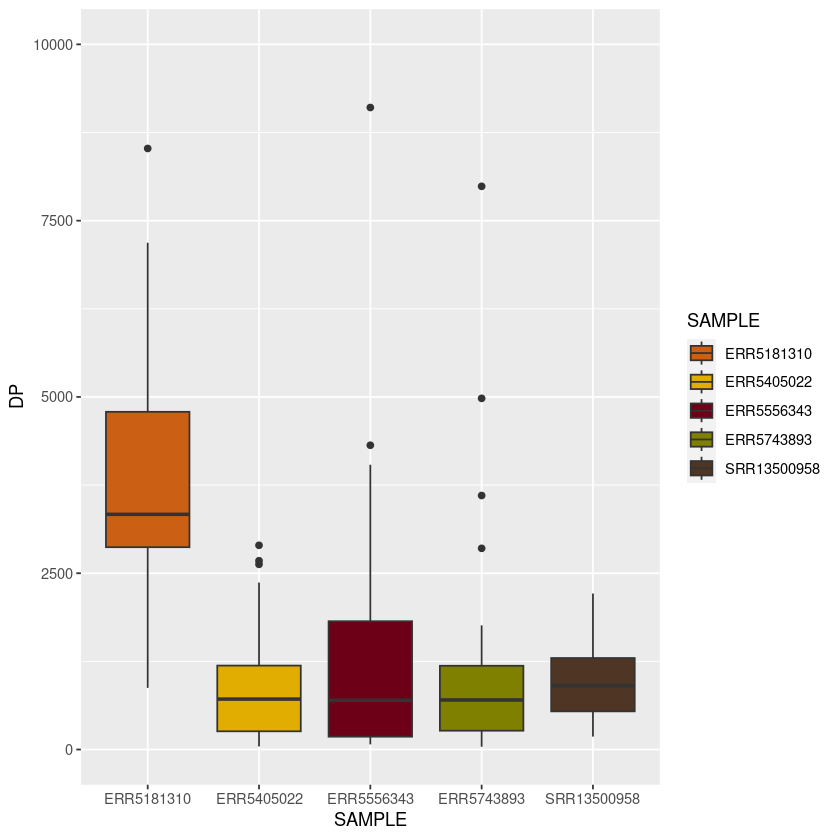

In [67]:
# Colours for filling options with manual colors
ggplot(data = var_tb, aes(x=SAMPLE, y=DP, fill= SAMPLE)) + geom_boxplot() + ylim(0,10000) + scale_fill_manual(values=c("#cb6015", "#e1ad01", "#6d0016", "#808000", "#4e3524"))

Installing package into ‘/home/ms/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”


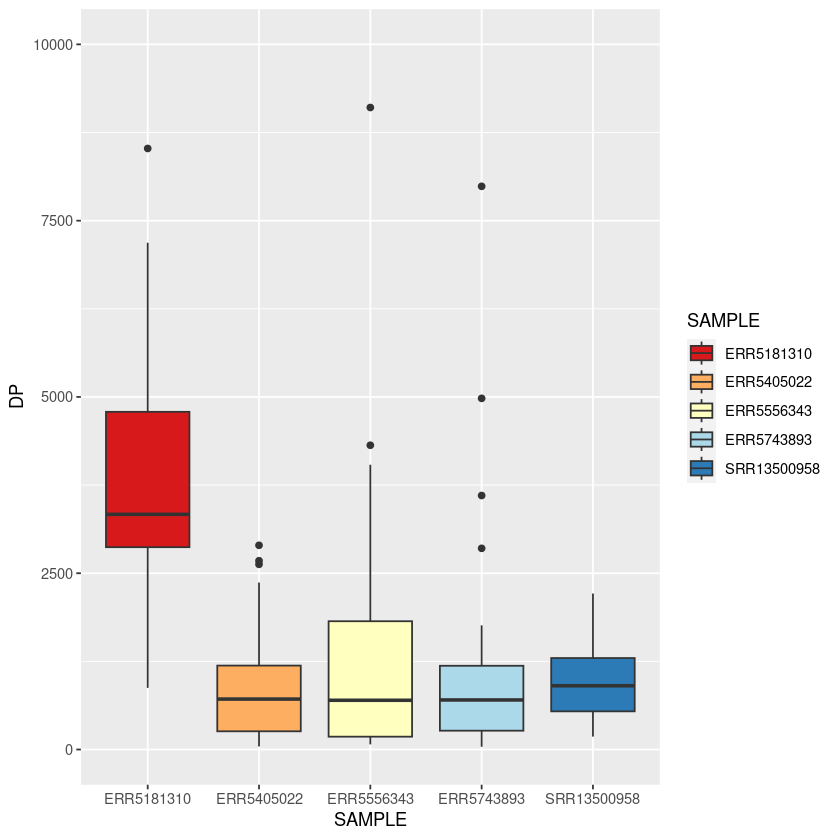

In [72]:
# Colours for filling with preset palettes
install.packages("RColorBrewer")
library(RColorBrewer)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP, fill= SAMPLE)) + geom_boxplot() + ylim(0,10000) + scale_fill_brewer(palette="RdYlBu")

#### Change legend position

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”


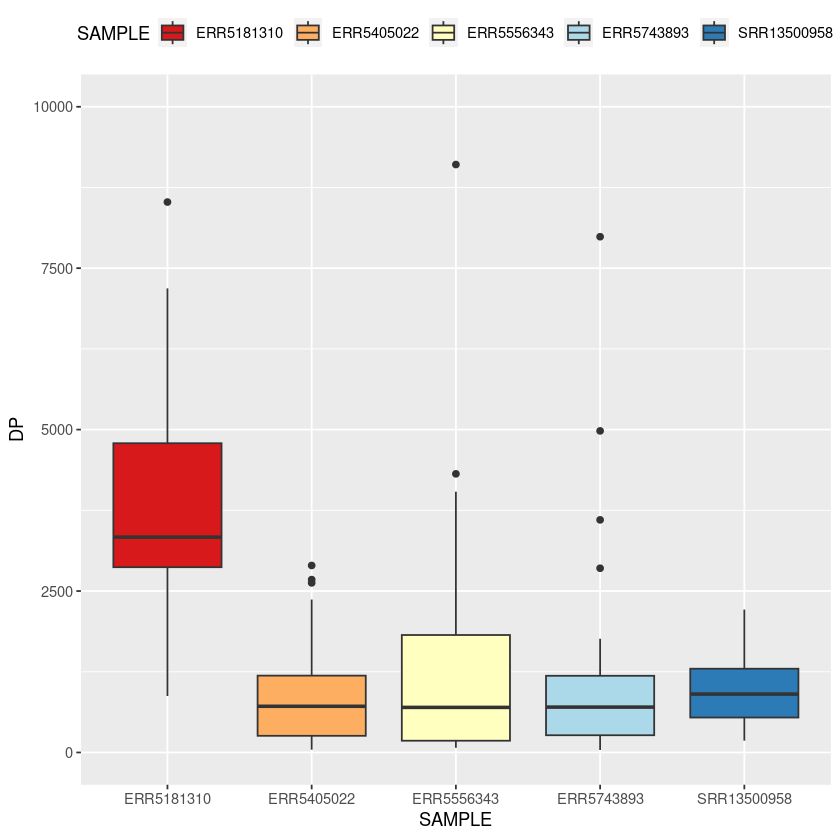

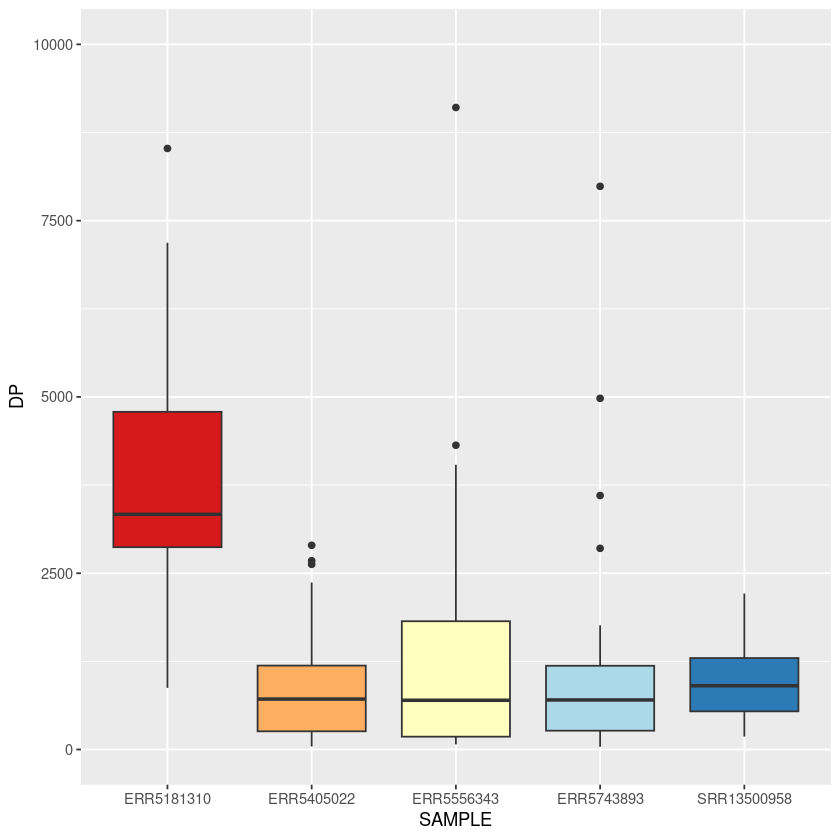

In [74]:
ggplot(data = var_tb, aes(x=SAMPLE, y=DP, fill= SAMPLE)) + geom_boxplot() + ylim(0,10000) + scale_fill_brewer(palette="RdYlBu") + theme(legend.position="top")
ggplot(data = var_tb, aes(x=SAMPLE, y=DP, fill= SAMPLE)) + geom_boxplot() + ylim(0,10000) + scale_fill_brewer(palette="RdYlBu") + theme(legend.position="none")

#### Change plot and axis titles

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”


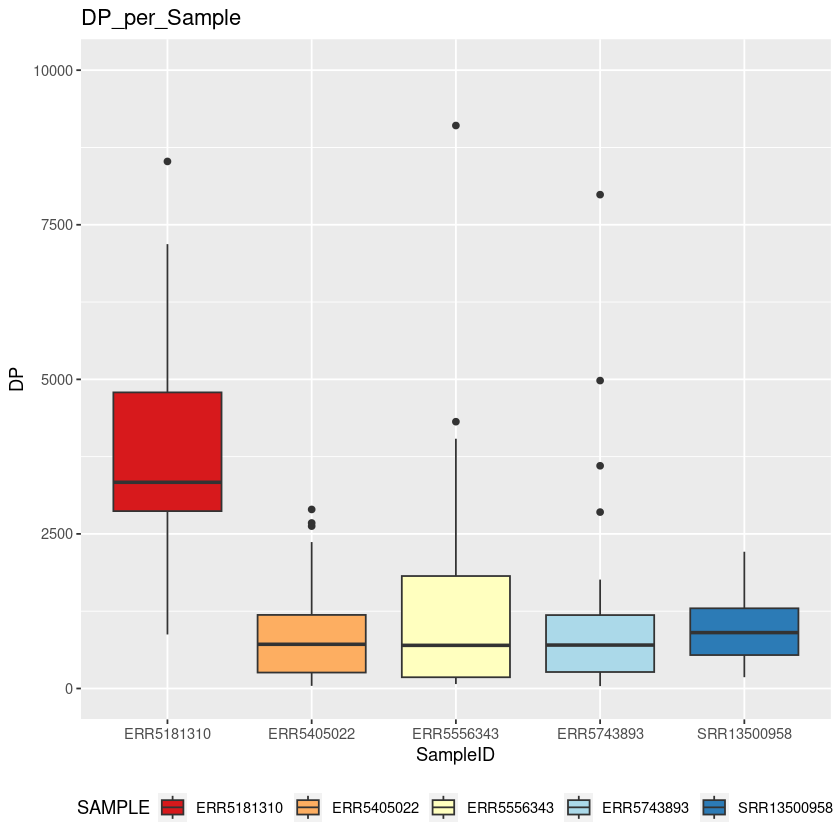

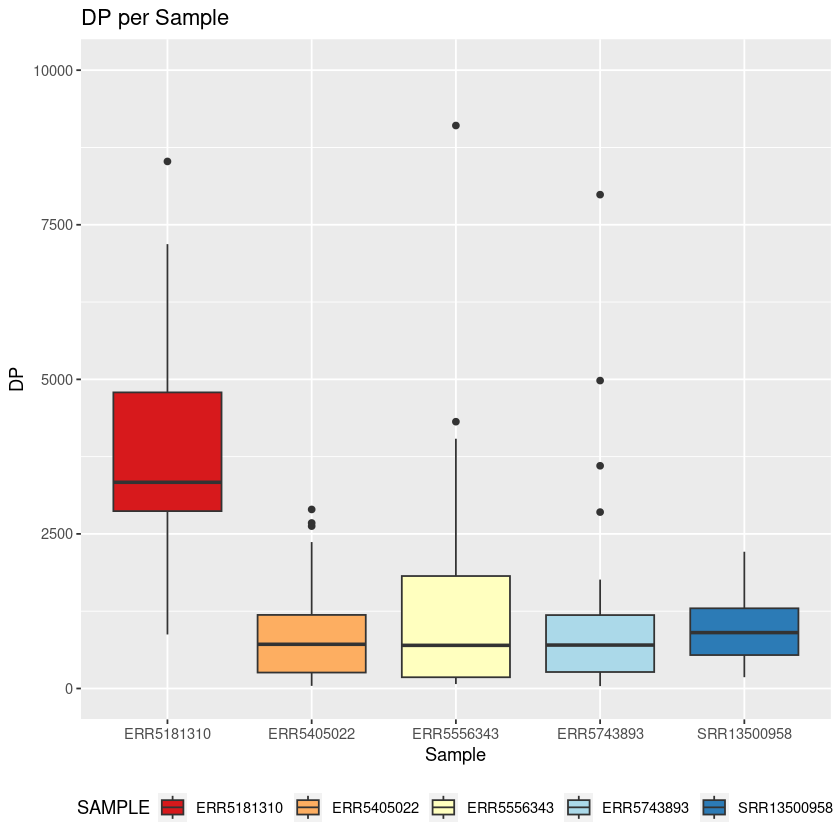

In [75]:
ggplot(data = var_tb, aes(x=SAMPLE, y=DP, fill= SAMPLE)) + geom_boxplot() + ylim(0,10000) + scale_fill_brewer(palette="RdYlBu") + theme(legend.position="bottom") + labs(title="DP_per_Sample", x="SampleID", y = "DP")
ggplot(data = var_tb, aes(x=SAMPLE, y=DP, fill= SAMPLE)) + geom_boxplot() + ylim(0,10000) + scale_fill_brewer(palette="RdYlBu") + theme(legend.position="bottom") + ggtitle("DP per Sample") + xlab("Sample") + ylab("DP")

#### Change shapes, colors, and sizes

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


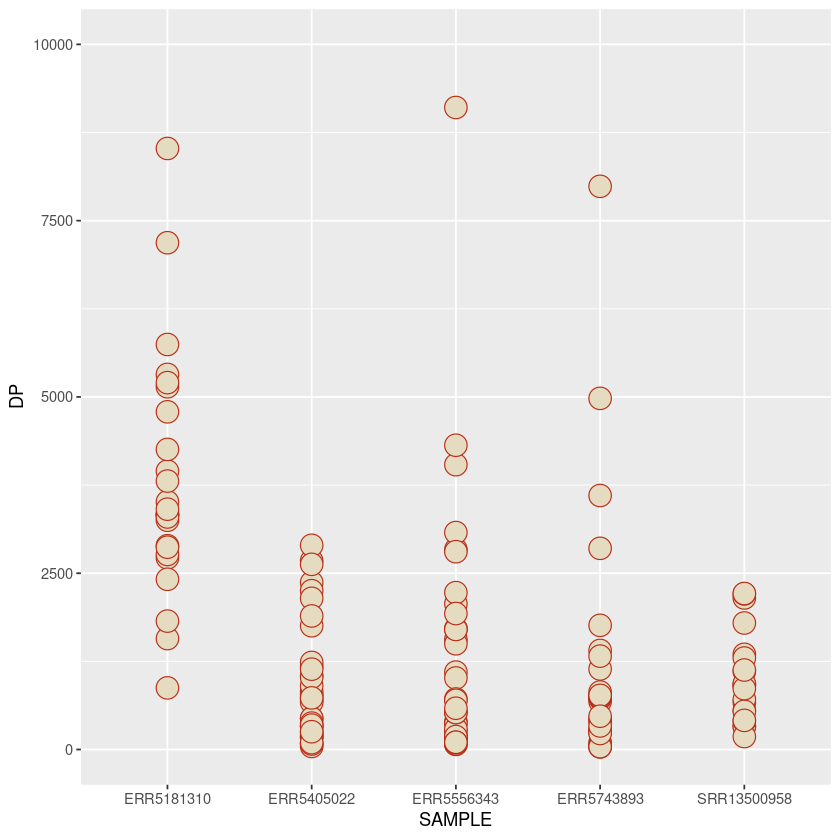

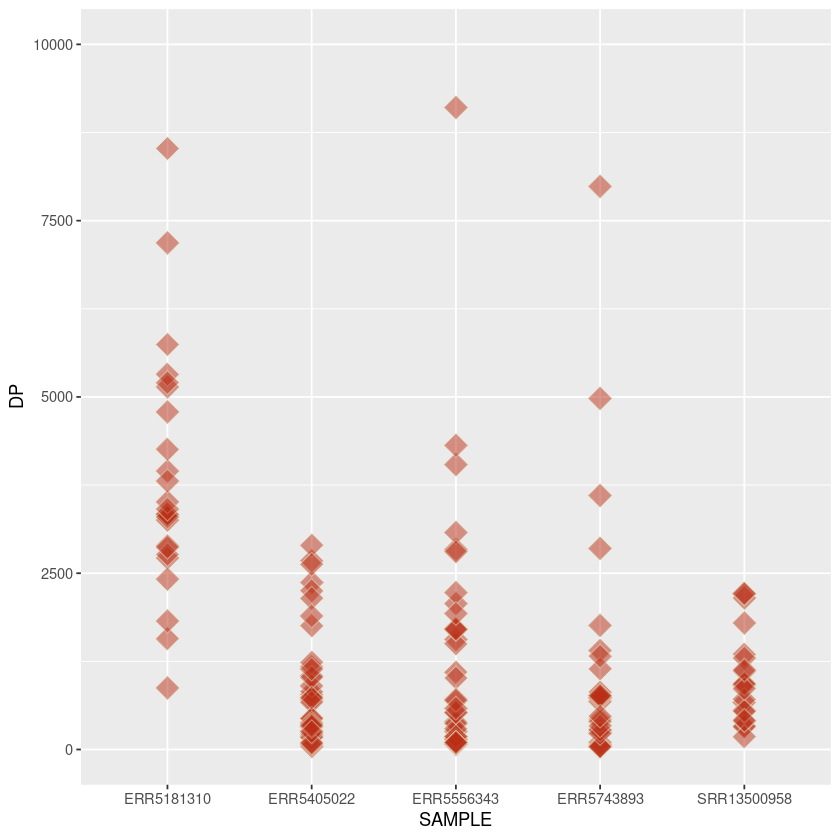

In [76]:
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) +  geom_point(shape = 21, fill = "#e4dbc1", color = "#b92e17", size = 6) + ylim(0,10000)
ggplot(data = var_tb, aes(x=SAMPLE, y=DP)) +  geom_point(shape = 23, color = "#e4dbc1", fill = "#b92e17", size = 5, alpha=0.5) + ylim(0,10000)

Installing package into ‘/home/ms/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pkgbuild’, ‘diffobj’, ‘brio’, ‘desc’, ‘pkgload’, ‘praise’, ‘waldo’, ‘testthat’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggsci’, ‘ggsignif’, ‘polynom’, ‘rstatix’


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


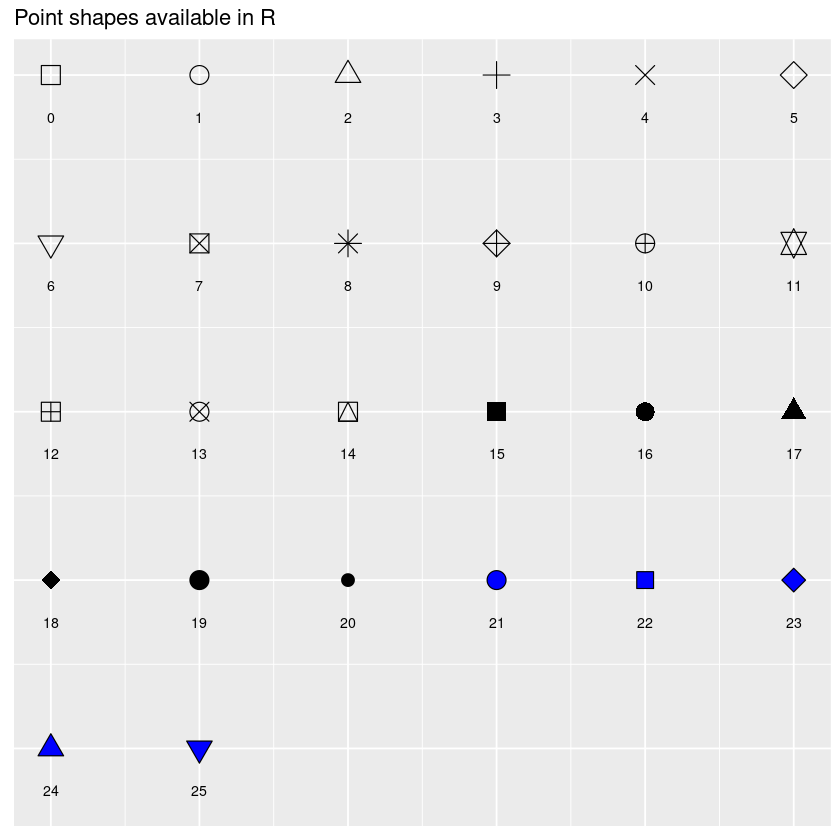

In [79]:
#All possible points displayed
install.packages("ggpubr")
library(ggpubr)
ggpubr::show_point_shapes()

#### Progressing in variants exploration: Variants data to explore

In [80]:
# View data 
View(var_tb)

SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERR5181310,MN908947.3,241,C,T,PASS,8524,6,8518,1.00,orf1ab,upstream_gene_variant,c.-25C>T,.,.,ivar
ERR5181310,MN908947.3,1807,A,G,PASS,2890,1,2889,1.00,orf1ab,synonymous_variant,c.1542A>G,p.Gly514Gly,p.G514G,ivar
ERR5181310,MN908947.3,2659,G,A,PASS,13621,4,13617,1.00,orf1ab,synonymous_variant,c.2394G>A,p.Lys798Lys,p.K798K,ivar
ERR5181310,MN908947.3,3037,C,T,PASS,2718,0,2718,1.00,orf1ab,synonymous_variant,c.2772C>T,p.Phe924Phe,p.F924F,ivar
ERR5181310,MN908947.3,6285,C,T,PASS,20212,0,20212,1.00,orf1ab,missense_variant,c.6020C>T,p.Thr2007Ile,p.T2007I,ivar
ERR5181310,MN908947.3,8593,T,C,PASS,2414,0,2414,1.00,orf1ab,synonymous_variant,c.8328T>C,p.Val2776Val,p.V2776V,ivar
ERR5181310,MN908947.3,9565,C,T,PASS,874,0,874,1.00,orf1ab,synonymous_variant,c.9300C>T,p.Phe3100Phe,p.F3100F,ivar
ERR5181310,MN908947.3,11287,GTCTGGTTTT,G,PASS,14161,14068,14072,0.99,orf1ab,conservative_inframe_deletion,c.11023_11031delTCTGGTTTT,p.Ser3675_Phe3677del,p.S3675_F3677del,ivar
ERR5181310,MN908947.3,14407,CC,TT,PASS,2766,0,2766,1.00,orf1ab,synonymous_variant,c.14142_14143delCCinsTT,p.4716,p.4716,ivar


#### Distribution of DP values per chromosome and per sample

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”


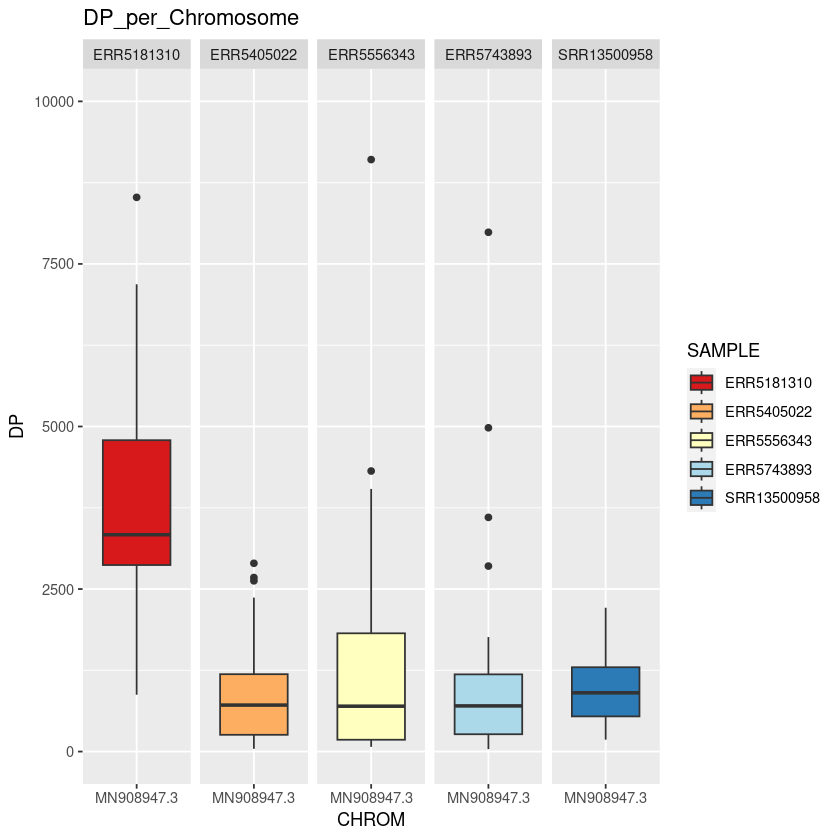

In [81]:
ggplot(data = var_tb, aes(x=CHROM, y=DP, fill= SAMPLE)) + geom_boxplot() + ylim(0,10000) + scale_fill_brewer(palette="RdYlBu") + labs(title="DP_per_Chromosome") + facet_grid(. ~ SAMPLE)

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 406 rows containing missing values (`geom_violin()`).”


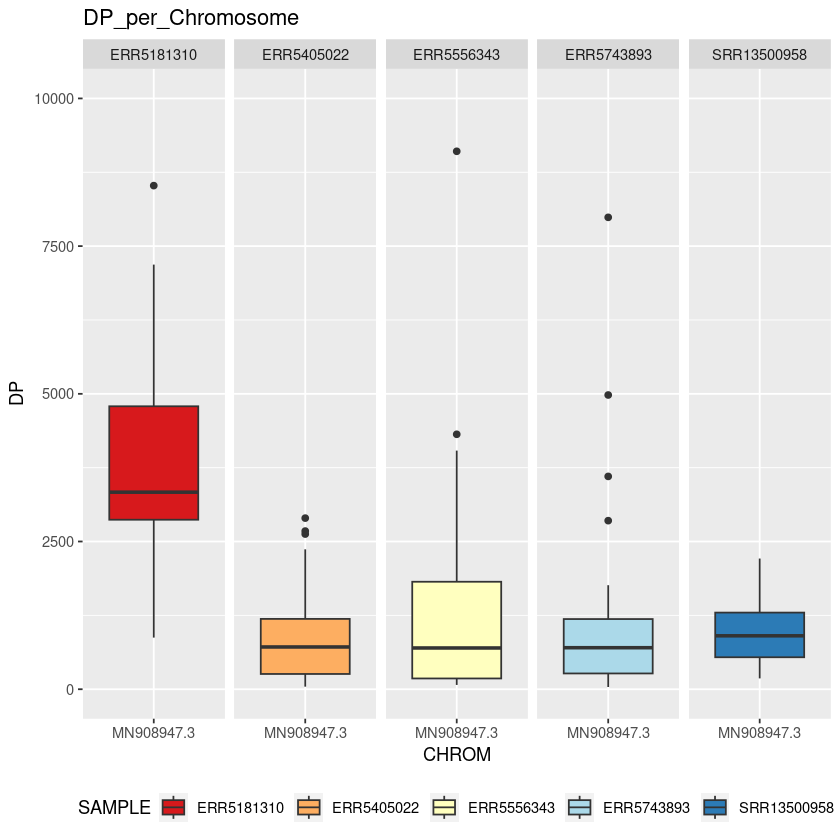

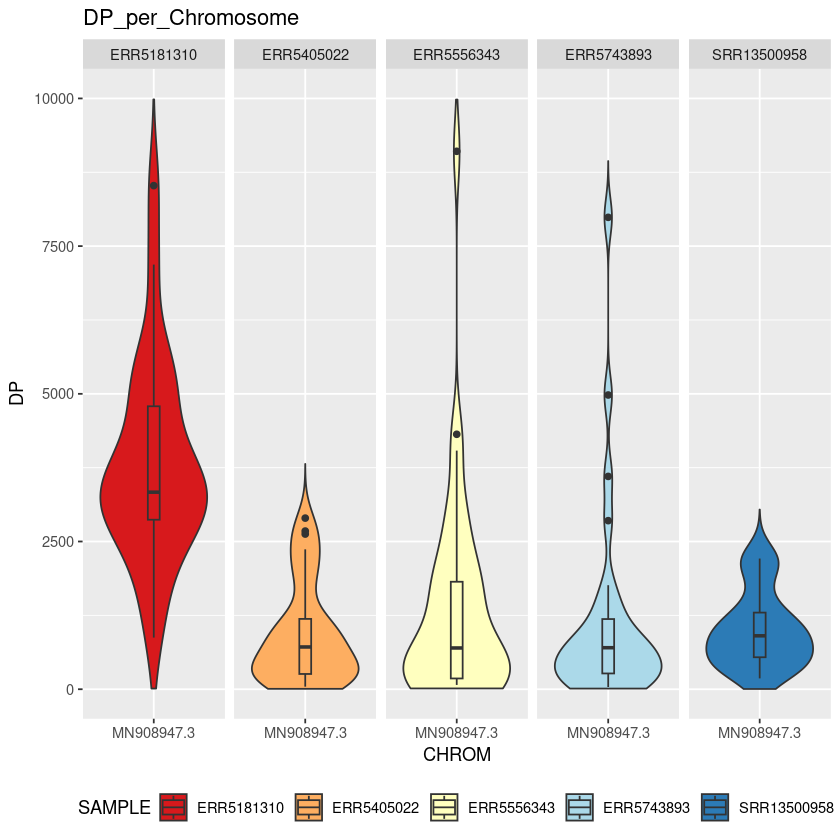

In [82]:
# Define a variable with plotting
p_DP_CHROM <- ggplot(data = var_tb, aes(x=CHROM, y=DP, fill= SAMPLE)) + ylim(0,10000) + scale_fill_brewer(palette="RdYlBu") + labs(title="DP_per_Chromosome") + theme(legend.position="bottom")
# Test boxplots with faceting 
p_DP_CHROM + geom_boxplot() + facet_grid(. ~ SAMPLE)
# Combine violin plots and boxplots with faceting
p_DP_CHROM + geom_violin(trim=FALSE) + facet_grid(. ~ SAMPLE) + geom_boxplot(width=0.1)

#### Variants effects per sample:Plotting the variants effects

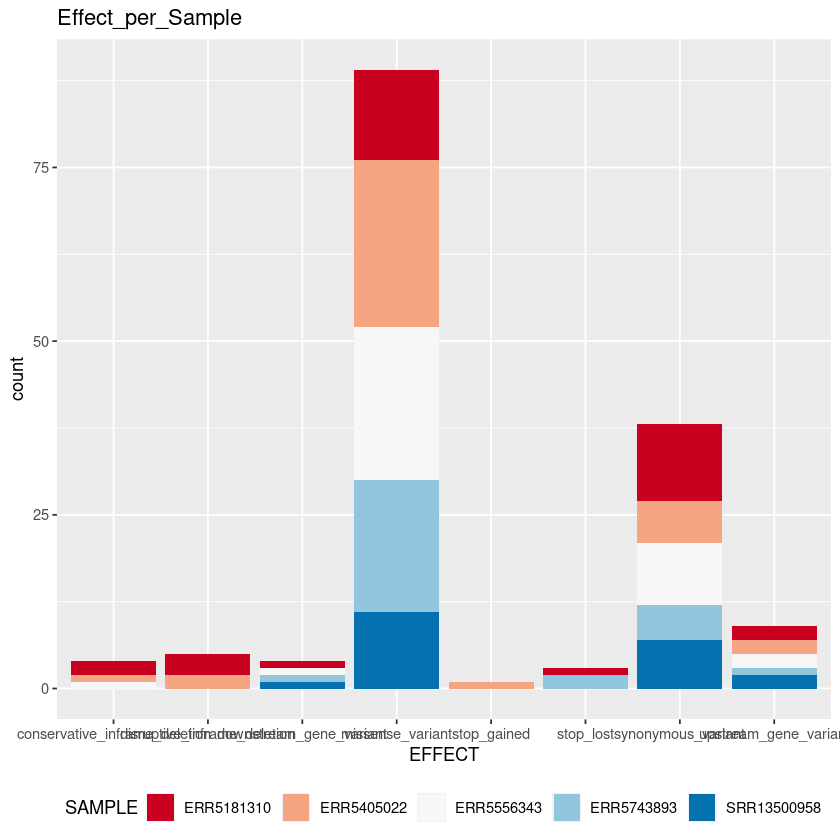

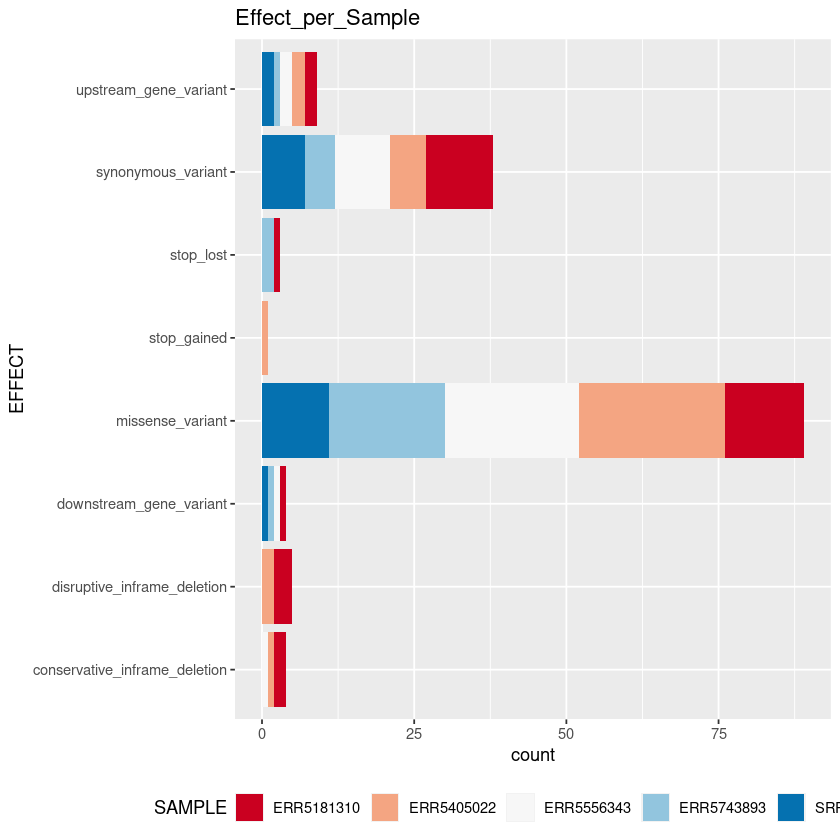

In [83]:
# Count number of different effects per sample
p_EFFECT <- ggplot(data = var_tb, aes(x=EFFECT, fill= SAMPLE)) + scale_fill_brewer(palette="RdBu") + labs(title="Effect_per_Sample") + theme(legend.position="bottom")
p_EFFECT + geom_bar()
# Flip orientation
p_EFFECT_flip <- ggplot(data = var_tb, aes(y=EFFECT, fill= SAMPLE)) + scale_fill_brewer(palette="RdBu") + labs(title="Effect_per_Sample") + theme(legend.position="bottom")
p_EFFECT_flip + geom_bar()

#### Counting the variants effects

In [84]:
# Count the number of effects
var_tb %>% count(EFFECT)

EFFECT,n
<chr>,<int>
conservative_inframe_deletion,4
disruptive_inframe_deletion,5
downstream_gene_variant,4
missense_variant,89
stop_gained,1
stop_lost,3
synonymous_variant,38
upstream_gene_variant,9


In [85]:
# Count the number of different effects and link them to sample
var_tb %>% count(EFFECT, SAMPLE, sort = TRUE)

EFFECT,SAMPLE,n
<chr>,<chr>,<int>
missense_variant,ERR5405022,24
missense_variant,ERR5556343,22
missense_variant,ERR5743893,19
missense_variant,ERR5181310,13
missense_variant,SRR13500958,11
synonymous_variant,ERR5181310,11
synonymous_variant,ERR5556343,9
synonymous_variant,SRR13500958,7
synonymous_variant,ERR5405022,6


#### The genes showing variants effects: Counting and extracting all effects for all genes

In [87]:
# Counting the effects per gene
var_tb %>% count(EFFECT, GENE, sort = TRUE)

EFFECT,GENE,n
<chr>,<chr>,<int>
missense_variant,S,35
synonymous_variant,orf1ab,29
missense_variant,orf1ab,27
missense_variant,N,16
synonymous_variant,S,5
upstream_gene_variant,orf1ab,5
disruptive_inframe_deletion,S,4
downstream_gene_variant,S,4
missense_variant,ORF8,4


#### Counting and extracting specific effects for all genes

In [88]:
# Filtering option 1 to select for effect on stop
filter(var_tb, EFFECT == "stop_lost" | EFFECT == "stop_gained")
# Filtering option 2 to select for effect on stop
filter(var_tb, EFFECT %in% c("stop_lost", "stop_gained"))
# Filtering on effect and selected columns
filter(var_tb, EFFECT %in% c("stop_lost", "stop_gained")) %>% select(SAMPLE, CHROM, GENE, EFFECT)

SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERR5181310,MN908947.3,20724,A,G,PASS,4789,0,4786,1,orf1ab,stop_lost,c.20459A>G,p.Ter6820Trpext*?,p.*6820Wext*?,ivar
ERR5405022,MN908947.3,27972,C,T,PASS,374,0,374,1,ORF8,stop_gained,c.79C>T,p.Gln27*,p.Q27*,ivar
ERR5743893,MN908947.3,17523,G,T,PASS,1405,0,1405,1,orf1ab,stop_lost,c.17258G>T,p.Ter5753Leuext*?,p.*5753Lext*?,ivar
ERR5743893,MN908947.3,18210,G,T,PASS,815,0,815,1,orf1ab,stop_lost,c.17945G>T,p.Ter5982Leuext*?,p.*5982Lext*?,ivar


SAMPLE,CHROM,POS,REF,ALT,FILTER,DP,REF_DP,ALT_DP,AF,GENE,EFFECT,HGVS_C,HGVS_P,HGVS_P_1LETTER,CALLER
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERR5181310,MN908947.3,20724,A,G,PASS,4789,0,4786,1,orf1ab,stop_lost,c.20459A>G,p.Ter6820Trpext*?,p.*6820Wext*?,ivar
ERR5405022,MN908947.3,27972,C,T,PASS,374,0,374,1,ORF8,stop_gained,c.79C>T,p.Gln27*,p.Q27*,ivar
ERR5743893,MN908947.3,17523,G,T,PASS,1405,0,1405,1,orf1ab,stop_lost,c.17258G>T,p.Ter5753Leuext*?,p.*5753Lext*?,ivar
ERR5743893,MN908947.3,18210,G,T,PASS,815,0,815,1,orf1ab,stop_lost,c.17945G>T,p.Ter5982Leuext*?,p.*5982Lext*?,ivar


SAMPLE,CHROM,GENE,EFFECT
<chr>,<chr>,<chr>,<chr>
ERR5181310,MN908947.3,orf1ab,stop_lost
ERR5405022,MN908947.3,ORF8,stop_gained
ERR5743893,MN908947.3,orf1ab,stop_lost
ERR5743893,MN908947.3,orf1ab,stop_lost


#### Read depth per position

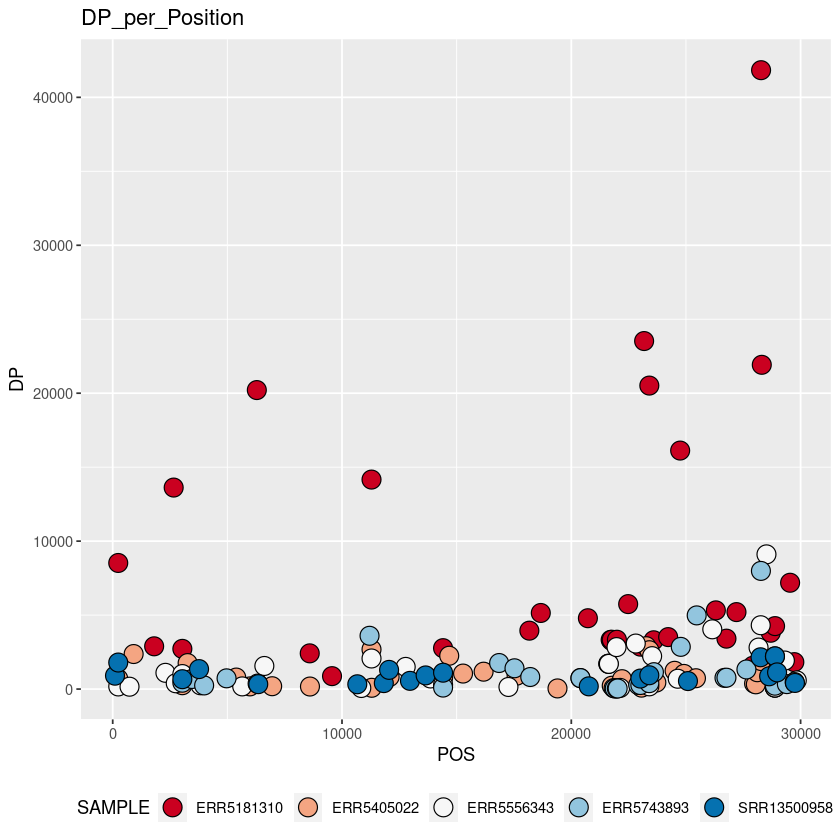

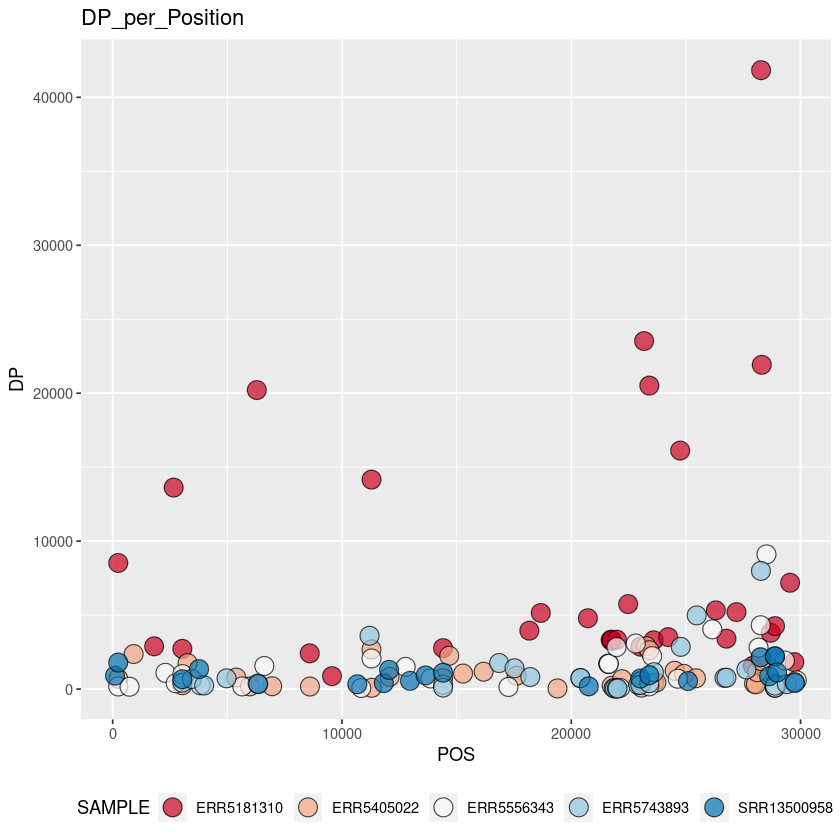

In [89]:
# Define your variable
p_DP_POS <- ggplot(data = var_tb, aes(x=POS, y=DP, fill= SAMPLE)) + scale_fill_brewer(palette="RdBu") + labs(title="DP_per_Position") + theme(legend.position="bottom")

# Plot
p_DP_POS + geom_point(shape = 21, size = 5)

# Plot with transparency options
p_DP_POS + geom_point(shape = 21, size = 5, alpha = 0.7)